In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import glob

In [10]:
# Load the CSV file
file_path = 'LSV data.csv'
data = pd.read_csv(file_path)
data

,I-16-2,Unnamed: 1,I-16-3,Unnamed: 3,I-16-1,Unnamed: 5,PES0.45-1(5),Unnamed: 7,PES0.45-2(5),Unnamed: 9,...,Sartorius_CelluloseNitrate0.45-2(2),Unnamed: 39,Sartorius_CelluloseNitrate0.45-3(2),Unnamed: 41,Sartorius_CelluloseNitrate5-1(1),Unnamed: 43,Sartorius_CelluloseNitrate5-2(1),Unnamed: 45,Sartorius_CelluloseNitrate5-3(1),Unnamed: 47
0,V,µA,V,µA,V,µA,V,µA,V,µA,...,V,µA,V,µA,V,µA,V,µA,V,µA
1,-1.00004,-1345.23,-1.00004,-1301.22,-1.00004,-884.751,-1.00004,-1716.98,-1.00004,-1795.37,...,-1.00004,-2082.38,-1.00004,-2124.1,-1.00004,-1257.02,-1.00004,-937.823,-1.00004,-1282.29
2,-0.990043,-1289.16,-0.990043,-1246.05,-0.990043,-854.472,-0.990043,-1665.34,-0.990043,-1730.66,...,-0.990043,-2007.95,-0.990043,-2046.85,-0.990043,-1196.84,-0.990043,-893.954,-0.990043,-1220.45
3,-0.980042,-1238.99,-0.980042,-1195.84,-0.980042,-825.337,-0.980042,-1613.89,-0.980042,-1671.49,...,-0.980042,-1940.42,-0.980042,-1976.95,-0.980042,-1140.1,-0.980042,-853.327,-0.980042,-1161.84
4,-0.970043,-1190.83,-0.970043,-1147.63,-0.970043,-796.965,-0.970043,-1549.94,-0.970043,-1604.4,...,-0.970043,-1876.43,-0.970043,-1909.43,-0.970043,-1085.69,-0.970043,-813.988,-0.970043,-1109.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,0.958871,847.987,0.958871,855.664,0.958871,556.972,0.958871,955.8,0.958871,843.457,...,0.958871,940.494,0.958871,929.764,0.958871,970.677,0.958871,892.523,0.958871,868.348
198,0.968871,853.232,0.968871,863.675,0.968871,560.786,0.968871,956.563,0.968871,851.944,...,0.968871,950.126,0.968871,938.92,0.968871,967.053,0.968871,895.718,0.968871,869.683
199,0.978871,859.049,0.978871,871.066,0.978871,564.411,0.978871,963.799,0.978871,859.097,...,0.978871,959.329,0.978871,949.41,0.978871,962.094,0.978871,898.674,0.978871,870.923
200,0.988871,864.724,0.988871,878.6,0.988871,567.892,0.988871,969.819,0.988871,867.919,...,0.988871,968.818,0.988871,960.235,0.988871,956.944,0.988871,901.106,0.988871,871.161


In [11]:
# Filter out columns with "V" in their name, skipping the first row
voltage_columns = data.iloc[1:][data.columns[data.columns.str.contains('V')]]

# Convert the values to numeric, as they are currently read as strings
voltage_columns = voltage_columns.apply(pd.to_numeric, errors='coerce')

# Check if all "V" columns are the same
are_v_columns_same = voltage_columns.eq(voltage_columns.iloc[:, 0], axis=0).all().all()
are_v_columns_same


True

In [16]:
# Extracting the first voltage column as the common voltage for all measurement sets
voltage_column = data.iloc[1:, 0].astype(float).reset_index(drop=True)

# Creating a list to hold the current data columns
current_data = []

# Iterating over the pairs of columns to extract and name the current columns
for i in range(1, len(data.columns), 2):
    current_column = data.iloc[1:, i].astype(float).reset_index(drop=True)
    current_column_name = data.columns[i-1]
    current_data.append((current_column_name, current_column))

# Creating the DataFrame
processed_data = pd.DataFrame([voltage_column] + [col for name, col in current_data], index=['V'] + [name for name, col in current_data]).T

# Showing the first few rows of the processed dataframe
processed_data.head()


,V,I-16-2,I-16-3,I-16-1,PES0.45-1(5),PES0.45-2(5),PES0.45-3(5),PVDF0.2-1(3),PVDF0.2-2(3),PVDF0.2-3(3),...,PVDF5-3(6),PW-1,PW-2,PW-3,Sartorius_CelluloseNitrate0.45-1(2),Sartorius_CelluloseNitrate0.45-2(2),Sartorius_CelluloseNitrate0.45-3(2),Sartorius_CelluloseNitrate5-1(1),Sartorius_CelluloseNitrate5-2(1),Sartorius_CelluloseNitrate5-3(1)
0,-1.000040,-1345.23,-1301.22,-884.751,-1716.98,-1795.37,-1937.99,-1048.350,-2234.68,-1965.03,...,-1033.620,-1289.83,-753.000,-1149.540,-1958.74,-2082.38,-2124.10,-1257.02,-937.823,-1282.29
1,-0.990043,-1289.16,-1246.05,-854.472,-1665.34,-1730.66,-1868.18,-1004.530,-2149.80,-1887.88,...,-988.034,-1258.21,-725.916,-1097.520,-1882.25,-2007.95,-2046.85,-1196.84,-893.954,-1220.45
2,-0.980042,-1238.99,-1195.84,-825.337,-1613.89,-1671.49,-1804.24,-969.867,-2073.22,-1819.21,...,-947.217,-1214.34,-700.453,-1060.320,-1811.96,-1940.42,-1976.95,-1140.10,-853.327,-1161.84
3,-0.970043,-1190.83,-1147.63,-796.965,-1549.94,-1604.40,-1746.69,-936.440,-2000.17,-1753.93,...,-908.497,-1158.07,-675.991,-1016.070,-1741.87,-1876.43,-1909.43,-1085.69,-813.988,-1109.63
4,-0.960043,-1144.77,-1097.85,-768.259,-1496.54,-1548.65,-1689.85,-904.015,-1929.89,-1691.42,...,-871.399,-1120.93,-653.770,-972.346,-1672.15,-1814.59,-1844.34,-1031.90,-774.076,-1055.84


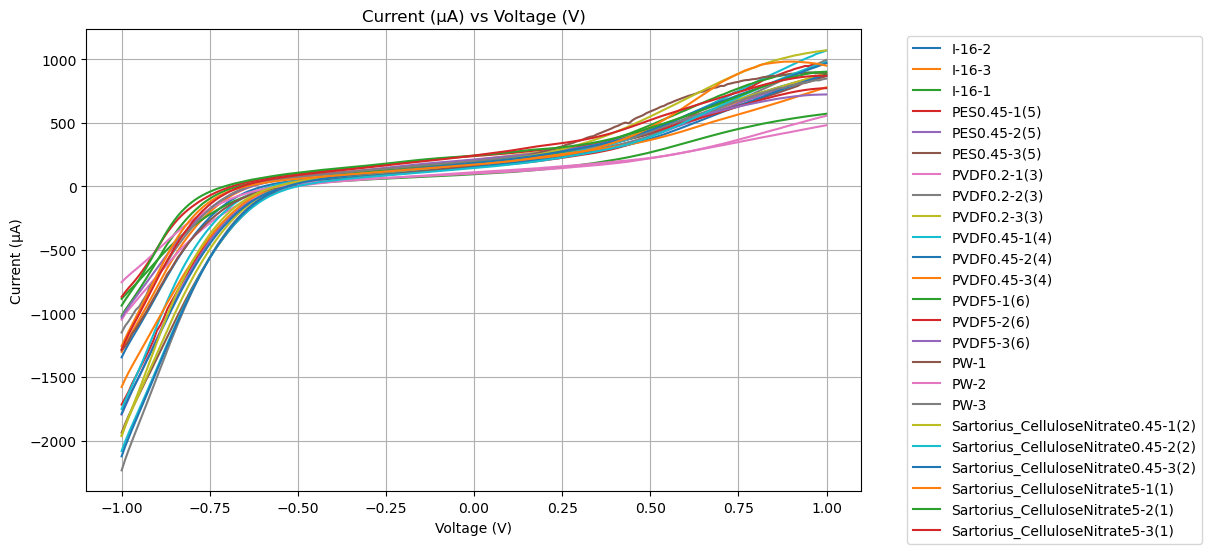

In [17]:
import matplotlib.pyplot as plt

# Setting up the plot
plt.figure(figsize=(10, 6))
plt.title('Current (µA) vs Voltage (V)')
plt.xlabel('Voltage (V)')
plt.ylabel('Current (µA)')

# Plotting the current over voltage for all measurement sets
for column in processed_data.columns[1:]:
    plt.plot(processed_data['V'], processed_data[column], label=column)

# Adding a legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Show the plot
plt.show()


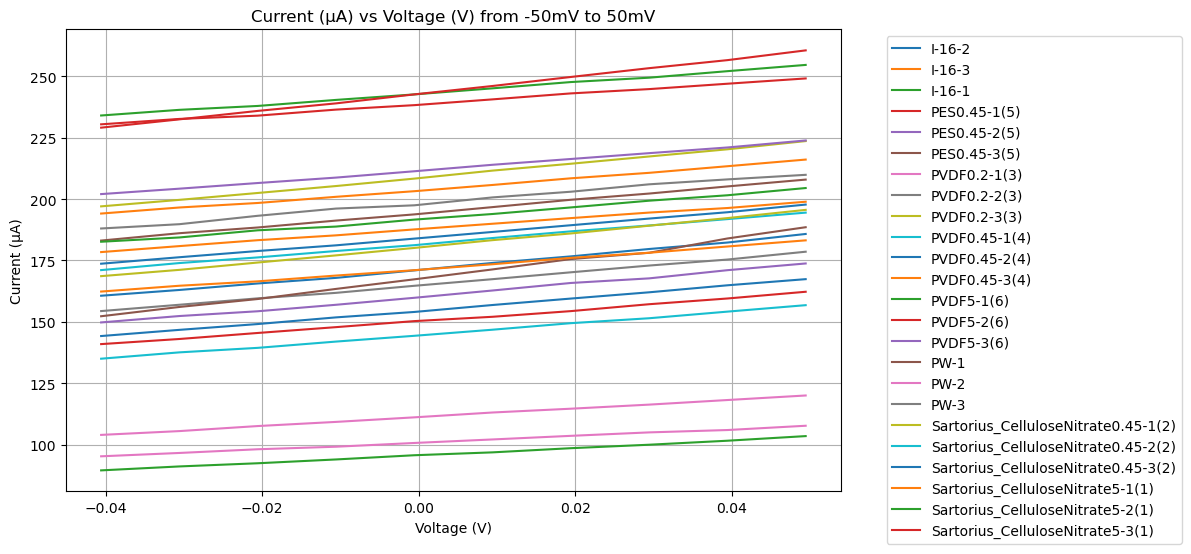

In [18]:
# Setting up the plot
plt.figure(figsize=(10, 6))
plt.title('Current (µA) vs Voltage (V) from -50mV to 50mV')
plt.xlabel('Voltage (V)')
plt.ylabel('Current (µA)')

# Filtering the data for voltages between -50mV and 50mV
filtered_data = processed_data[(processed_data['V'] >= -0.05) & (processed_data['V'] <= 0.05)]

# Plotting the current over voltage for all measurement sets within the specified voltage range
for column in filtered_data.columns[1:]:
    plt.plot(filtered_data['V'], filtered_data[column], label=column)

# Adding a legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Show the plot
plt.show()


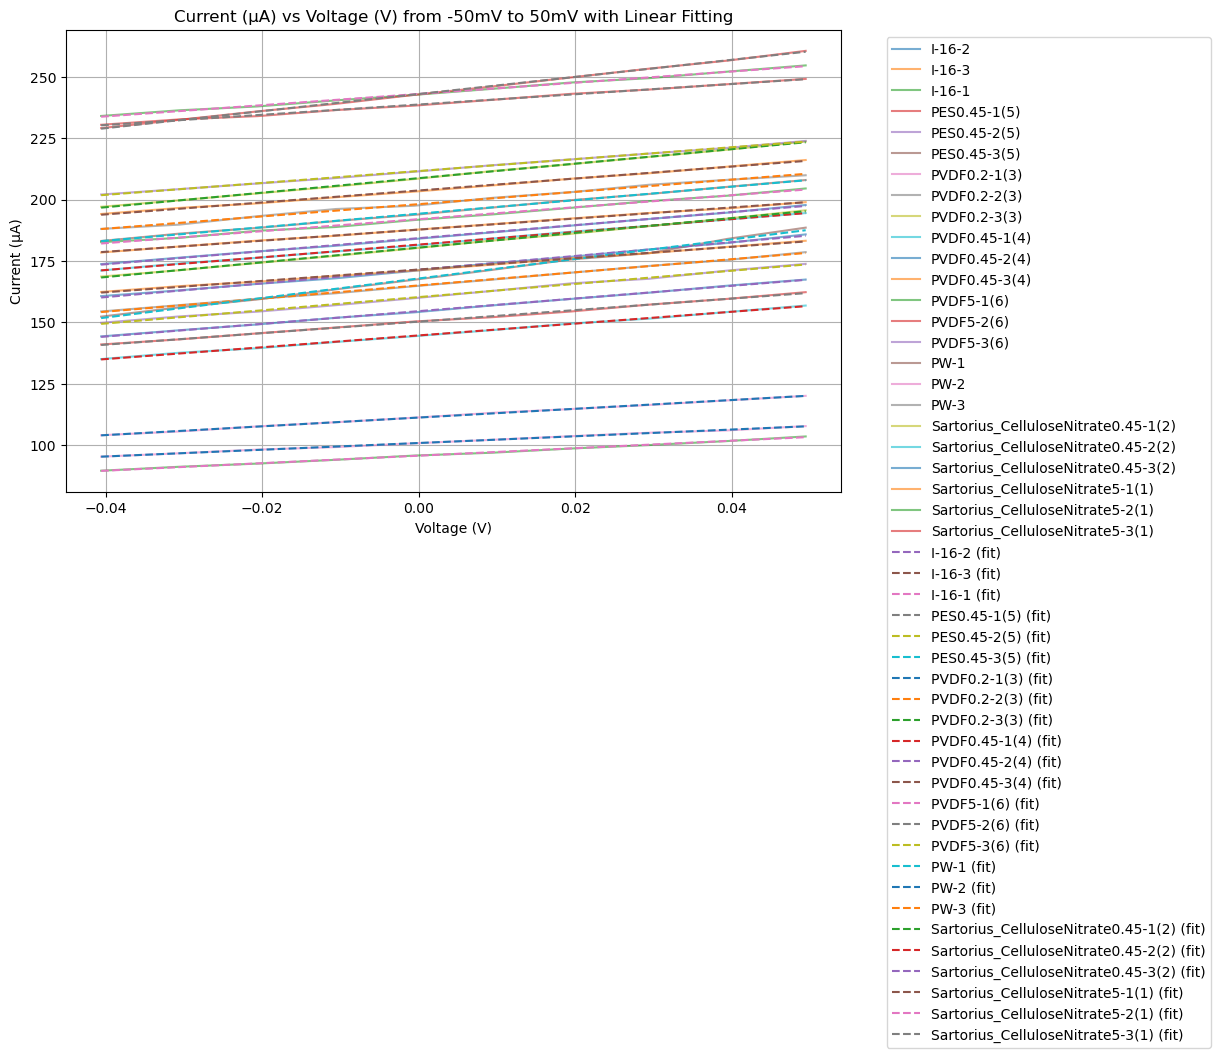

In [24]:
# Setting up the plot
plt.figure(figsize=(10, 6))
plt.title('Current (µA) vs Voltage (V) from -50mV to 50mV with Linear Fitting')
plt.xlabel('Voltage (V)')
plt.ylabel('Current (µA)')

# Plotting the current over voltage for all measurement sets within the specified voltage range
for column in filtered_data.columns[1:]:
    plt.plot(filtered_data['V'], filtered_data[column], label=column, alpha=0.6)

# Calculating and plotting the linear fittings
for column in filtered_data.columns[1:]:
    voltage_data = filtered_data['V'].values.reshape(-1, 1)
    current_data = filtered_data[column].values
    
    # Perform linear regression
    lin_reg = LinearRegression()
    lin_reg.fit(voltage_data, current_data)
    
    # Calculate fitted current values
    fitted_current = lin_reg.predict(voltage_data)
    
    # Plotting the linear fitting
    plt.plot(filtered_data['V'], fitted_current, linestyle='--', label=f'{column} (fit)')

# Adding a legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Show the plot
plt.show()


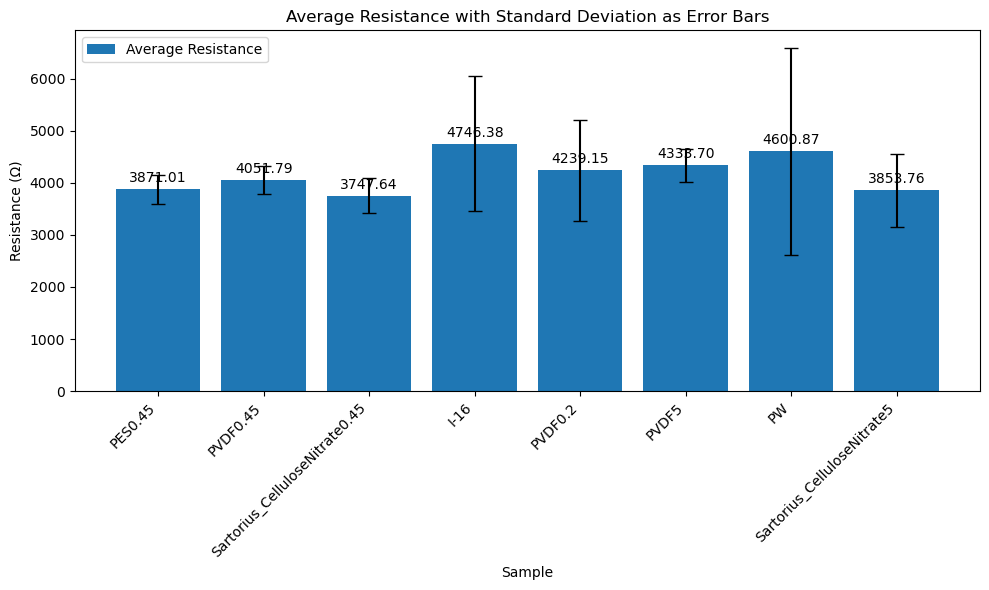

In [22]:
import numpy as np

# Function to calculate resistance using linear regression
def calculate_resistance(voltage, current):
    if len(voltage) != len(current):
        return np.nan, np.nan
    
    # Reshape voltage data for linear regression
    voltage = voltage.values.reshape(-1, 1)
    current = current.values
    
    # Perform linear regression
    lin_reg = LinearRegression()
    lin_reg.fit(voltage, current)
    
    # Calculate slope (1/R) and intercept
    slope = lin_reg.coef_[0]
    intercept = lin_reg.intercept_
    
    # Calculate resistance (R = 1/slope) if slope is not zero
    if slope != 0:
        resistance = 1 / slope
    else:
        resistance = np.nan
    
    return resistance * 1e6, intercept  # Convert resistance to ohms

# Calculate resistance for each sample and repeat
resistances = {column: calculate_resistance(filtered_data['V'], filtered_data[column]) for column in filtered_data.columns[1:]}

# Calculate average and standard deviation of resistance across repeats for each sample
resistance_stats = {}
for sample in set(column.rsplit('-', 1)[0] for column in resistances):
    sample_resistances = [resistance for column, (resistance, intercept) in resistances.items() if column.startswith(sample)]
    resistance_stats[sample] = {
        'average': np.nanmean(sample_resistances),
        'std_dev': np.nanstd(sample_resistances)
    }

# Plotting the average and standard deviation of resistance
samples = list(resistance_stats.keys())
averages = [resistance_stats[sample]['average'] for sample in samples]
std_devs = [resistance_stats[sample]['std_dev'] for sample in samples]

bar_width = 0.35
index = np.arange(len(samples))

# Plotting the average resistance with standard deviation as error bars
plt.figure(figsize=(10, 6))
bar = plt.bar(index, averages, yerr=std_devs, capsize=5, label='Average Resistance')

plt.xlabel('Sample')
plt.ylabel('Resistance (Ω)')
plt.title('Average Resistance with Standard Deviation as Error Bars')
plt.xticks(index, samples, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
# show values on top of bars
for rect in bar:
    height = rect.get_height()
    plt.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')
plt.show()


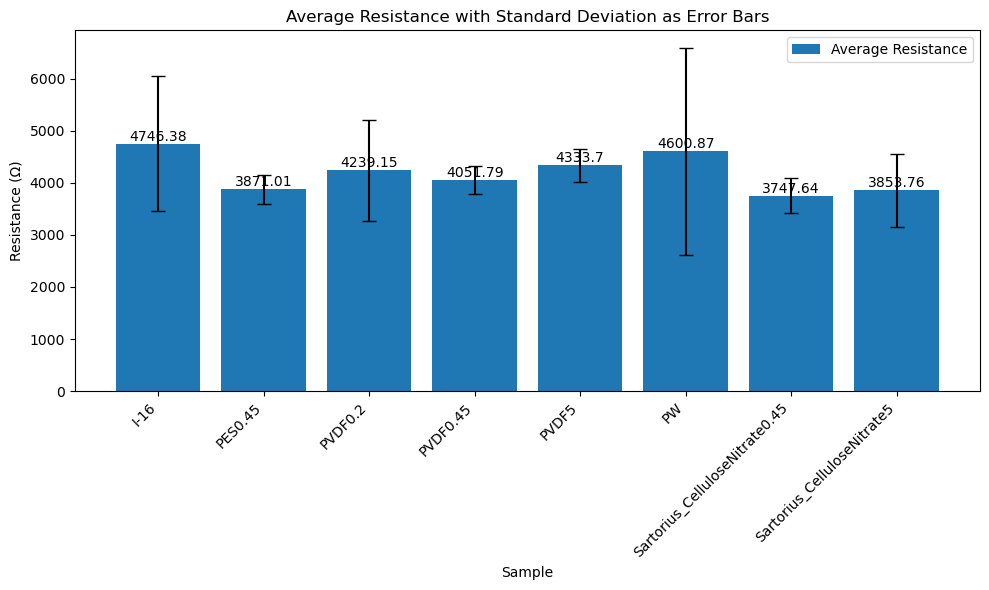

In [23]:
# Sorting the samples by name
sorted_samples = sorted(samples)

# Sorting the averages and standard deviations based on the sorted sample names
sorted_averages = [resistance_stats[sample]['average'] for sample in sorted_samples]
sorted_std_devs = [resistance_stats[sample]['std_dev'] for sample in sorted_samples]

# Creating the plot
plt.figure(figsize=(10, 6))
bars = plt.bar(np.arange(len(sorted_samples)), sorted_averages, yerr=sorted_std_devs, capsize=5, label='Average Resistance')

plt.xlabel('Sample')
plt.ylabel('Resistance (Ω)')
plt.title('Average Resistance with Standard Deviation as Error Bars')
plt.xticks(np.arange(len(sorted_samples)), sorted_samples, rotation=45, ha='right')

# Adding the text labels on top of each bar
for bar, value in zip(bars, sorted_averages):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(value, 2), ha='center', va='bottom')

plt.legend()
plt.tight_layout()
plt.show()


# EIS

In [2]:
path = 'EIS data'
all_files = glob.glob(path + "/*.csv")
df_dict = {}
for filename in all_files:
    # Read the csv file and append it to the list
    with open(filename, 'r', encoding='latin-1') as file:
        df_name = file.readline().split(',')[0] 
    df = pd.read_csv(filename, index_col=None, header=1, encoding='latin-1')
    df_dict[df_name] = df

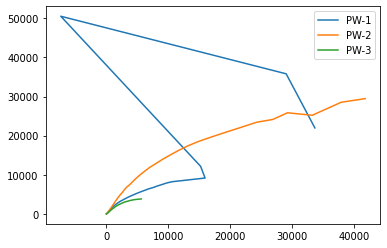

In [8]:
df1= df_dict['PW-1']
df2 = df_dict['PW-2']
df3 = df_dict['PW-3']
plt.plot(df1["Z' / Ohm"], df1["Z'' / Ohm"],label=('PW-1'))
plt.plot(df2["Z' / Ohm"], df2["Z'' / Ohm"],label=('PW-2'))
plt.plot(df3["Z' / Ohm"], df3["Z'' / Ohm"],label=('PW-3'))
plt.legend()

In [3]:
for name, dataframe in df_dict.items():
    print(f"DataFrame named {name}:")
    print(dataframe.head())  # Prints the first few rows of the DataFrame

DataFrame named PW-2:
   freq / Hz  Log(f / Hz)  neg. Phase / ¡ã  Z / Ohm  Z' / Ohm  Z'' / Ohm  \
0    50000.0     4.698970          15.6173  20.8955   20.1241    5.62529   
1    43487.4     4.638363          15.9342  21.2156   20.4005    5.82438   
2    37823.2     4.577758          16.4931  21.5115   20.6264    6.10711   
3    32896.7     4.517152          17.2767  21.9275   20.9381    6.51217   
4    28611.8     4.456545          18.0143  22.4392   21.3392    6.93943   

   Log(Z / Ohm)  
0      1.320053  
1      1.326655  
2      1.332671  
3      1.340989  
4      1.351007  
DataFrame named PVDF0.2-2(3):
   freq / Hz  Log(f / Hz)  neg. Phase / ¡ã  Z / Ohm  Z' / Ohm  Z'' / Ohm  \
0    50000.0     4.698970          50.9128  4.37318   2.75730    3.39441   
1    43487.4     4.638363          51.2144  5.16744   3.23693    4.02800   
2    37823.2     4.577758          52.2981  5.92593   3.62402    4.68861   
3    32896.7     4.517152          52.0617  6.86521   4.22082    5.41440   
4  

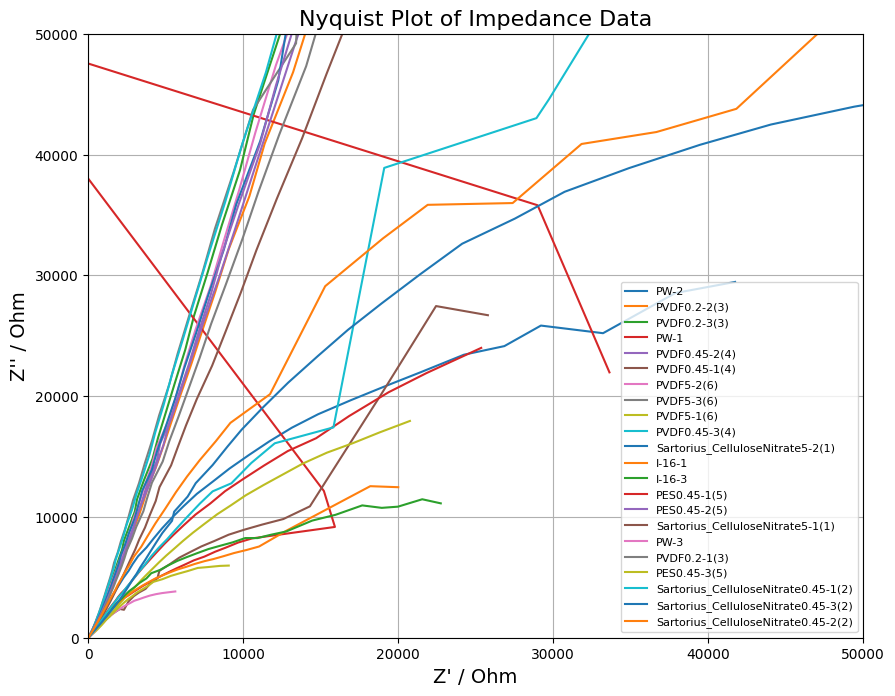

In [4]:
plt.figure(figsize=(10, 8), dpi=100)
for df_name, df in df_dict.items():
    # Plotting 'Z'' / Ohm' vs 'Z' / Ohm' and using the dataframe name as the label
    plt.plot(df["Z' / Ohm"], df["Z'' / Ohm"], label=df_name)

# Configure the plot with title, labels, and legend
plt.title("Nyquist Plot of Impedance Data", fontsize=16)
plt.xlabel("Z' / Ohm", fontsize=14)  # Real part of the impedance
plt.ylabel("Z'' / Ohm", fontsize=14)  # Imaginary part of the impedance
plt.legend(fontsize=8)  # Set a font size for legend to make it readable
plt.grid(True)  # Optional: Add a grid for better readability of plot
plt.xlim(0,50000)
plt.ylim(0,50000)
# Show the plot
plt.show()